# **Bike Sharing Demand Prediction**

### **Objective:**
The objective of this project is to develop a predictive model that can accurately forecast the demand for bike rentals on an hourly basis. By understanding the factors influencing bike rentals, the model aims to assist the bike-sharing service in optimizing its operations, managing bike inventory, and enhancing customer satisfaction.

### **Background:**
Bike-sharing systems have gained popularity as an eco-friendly and convenient mode of urban transportation. Accurate demand prediction is crucial for these systems to function efficiently. It enables better allocation of bikes, reduces customer wait times, and ensures availability across different locations. Effective demand forecasting can lead to cost savings, improved service quality, and increased user satisfaction.

### **Data Description:**
The dataset contains historical data on bike rentals, along with various environmental and seasonal information. The key features in the dataset include:

1. Date: Timestamp of the record. Rented_Bike_Count: Number of bikes rented at each hour.
2. Temperature(°C): Hourly temperature in Celsius.
3. Humidity(%): Hourly humidity in percentage.
4. Wind_speed(m/s): Hourly wind speed in meters per second.
5. Visibility(10m): Hourly visibility in meters.
6. Dew_point_temperature(°C): Dew point temperature in Celsius.
7. Solar_Radiation(MJ/m2): Hourly solar radiation in megajoules per square meter.
8. Rainfall(mm): Hourly rainfall in millimeters.
9. Snowfall(cm): Hourly snowfall in centimeters.
10. Seasons: Seasons (Winter, Spring, Summer, Fall).
11. Holiday: Whether the day is a holiday or not.
12. Functioning Day: Whether the day is a functioning day or not.

In [1]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding ='latin')

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Dataset Rows & Columns count
print(df.shape)

(8760, 14)


In [6]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#Rename the complex columns name
bike_df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature(°C)',
                                'Humidity(%)':'Humidity(%)',
                                'Wind speed (m/s)':'Wind_speed(m/s)',
                                'Visibility (10m)':'Visibility(10m)',
                                'Dew point temperature(°C)':'Dew_point_temperature(°C)',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation(MJ/m2)',
                                'Rainfall(mm)':'Rainfall(mm)',
                                'Snowfall (cm)':'Snowfall(cm)',
                                'Functioning Day':'Functioning_Day'})

In [8]:
# drop the Dew point temperature column
bike_df = bike_df.drop(['Dew_point_temperature(°C)'],axis=1)

In [9]:
# Breaking date column

# Changing the "Date" column into three "year","month","day" column
# bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day_name()

#creating a new column of "weekdays_weekend" and drop the column "Date", "year"
bike_df['Weekdays_Weekend'] = bike_df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','Year'],axis=1)

# Changing the datatype of Hour, Season, Holiday, Functioning Day, Month, Day, Weekdays_Weekend column into catagory column
categorical_variables = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
bike_df[categorical_variables] = bike_df[categorical_variables].astype('category')

In [10]:
# Changing the datatype of Hour, Season, Holiday, Functioning Day, Month, Day, Weekdays_Weekend column into catagory column
categorical_variables = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
bike_df[categorical_variables] = bike_df[categorical_variables].astype('category')

In [11]:
# Identify categorical variables
categorical_variables = [var for var in bike_df.columns if bike_df[var].dtype in ['category']]

# Identify numerical variables
numerical_variables = [var for var in bike_df.columns if bike_df[var].dtype in ['int64', 'float64']]

print(categorical_variables)
print(numerical_variables)

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)']


In [12]:
# Method 1- Inter Quartile Range for removing outliers from numerical variables

# Capping dataset to remove outliers
for i in numerical_variables:
    # Calculate IQR
    Q1 = bike_df[i].quantile(0.25)
    Q3 = bike_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Apply lower and upper limits to cap the outliers
    bike_df.loc[bike_df[i] > upper_limit, i] = upper_limit
    bike_df.loc[bike_df[i] < lower_limit, i] = lower_limit

In [13]:
# Transforming distribution to normal using different transformations

# For positively skewed data
bike_df['Rented_Bike_Count'] = (bike_df['Rented_Bike_Count'] + 1).transform(np.sqrt)
bike_df['Wind_speed(m/s)'] = (bike_df['Wind_speed(m/s)']+1).transform(np.log)
bike_df['Solar_Radiation(MJ/m2)'] = (bike_df['Solar_Radiation(MJ/m2)']+1).transform(np.log)

# For negatively skewed data
bike_df['Visibility(10m)']=(max(bike_df['Visibility(10m)']+1)-bike_df['Visibility(10m)']).transform(np.sqrt)

# For large skewed data
bike_df['Rainfall(mm)'] = (bike_df['Rainfall(mm)']+1).transform(np.log)
bike_df['Snowfall(cm)'] = (bike_df['Snowfall(cm)']+1).transform(np.log)

In [14]:
# Create a copy of the original dataset
bike_df_1 = bike_df.copy()

# Function to apply one-hot encoding to a specific column
def one_hot_encoding(data, column):
    # Generate dummy variables
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=False)
    # drop_first=True, drops one of the categories to avoid multicollinearity issues in linear models.
    # This means that for each categorical variable, one of its categories is dropped and encoded into
    # a column of zeros, while the rest are encoded into columns of ones.

    # Convert boolean to integers (0 and 1)
    dummies = dummies.astype(int)
    # When using one-hot encoding with 'get_dummies()', sometimes we get 'True' and 'False' values that
    # are actually Boolean values. However, since we're dealing with categorical string data, we need to
    # ensure that the output is converted to 0s and 1s so we convert the dummy variables to int.


    # Concatenate the original DataFrame with the dummy variables
    data = pd.concat([data, dummies], axis=1)
    # Drop the original categorical column
    data = data.drop([column], axis=1)
    return data

# Apply one-hot encoding to each categorical variable
for col in categorical_variables:
    bike_df_1 = one_hot_encoding(bike_df_1, col)

# Display the first few rows of the modified DataFrame
bike_df_1.head()

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Hour_0,Hour_1,...,Month_12,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Weekdays_Weekend_0,Weekdays_Weekend_1
0,15.968719,-5.2,37,1.163151,1.0,0.0,0.0,0.0,1,0,...,1,1,0,0,0,0,0,0,1,0
1,14.317821,-5.5,38,0.587787,1.0,0.0,0.0,0.0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,13.190906,-6.0,39,0.693147,1.0,0.0,0.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,10.392305,-6.2,40,0.641854,1.0,0.0,0.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,8.888194,-6.0,36,1.193922,1.0,0.0,0.0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [15]:
bike_df_1.columns

Index(['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed(m/s)', 'Visibility(10m)', 'Solar_Radiation(MJ/m2)',
       'Rainfall(mm)', 'Snowfall(cm)', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning_Day_No', 'Functioning_Day_Yes', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday', 'Weekdays_Weekend_0',
       'Weekdays_Weekend_1'],
      dtype='object')

In [16]:
#Assign the value in X and Y
independent_features = bike_df_1.drop(columns = ['Rented_Bike_Count'], axis = 1)
dependent_features = bike_df_1['Rented_Bike_Count']

In [17]:
independent_features.head()

,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Hour_0,Hour_1,Hour_2,...,Month_12,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Weekdays_Weekend_0,Weekdays_Weekend_1
0,-5.2,37,1.163151,1.0,0.0,0.0,0.0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,-5.5,38,0.587787,1.0,0.0,0.0,0.0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
2,-6.0,39,0.693147,1.0,0.0,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,-6.2,40,0.641854,1.0,0.0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,-6.0,36,1.193922,1.0,0.0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
dependent_features.head()

0    15.968719
1    14.317821
2    13.190906
3    10.392305
4     8.888194
Name: Rented_Bike_Count, dtype: float64

In [19]:
# Assuming independent_features is a DataFrame and dependent_features is a Series
independent_features = pd.DataFrame(independent_features)  # Ensure it's a DataFrame
dependent_features = pd.Series(dependent_features)  # Ensure it's a Series

scaler = MinMaxScaler()

# Scale independent features
independent_features_scaled = scaler.fit_transform(independent_features)

# Scale dependent features, convert to numpy array and reshape
dependent_features_scaled = scaler.fit_transform(dependent_features.values.reshape(-1, 1))

# Convert the scaled independent features back to a DataFrame
independent_features_scaled = pd.DataFrame(independent_features_scaled, columns=independent_features.columns)

# Convert the scaled dependent features back to a Series
dependent_features_scaled = pd.Series(dependent_features_scaled.flatten(), name=dependent_features.name)

# **ML Models**

In [20]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_features_scaled,dependent_features_scaled, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6570, 60)
(2190, 60)


In [21]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Temperature(°C)  Humidity(%)  Wind_speed(m/s)  Visibility(10m)  \
8639         0.377622     0.846939         0.439954         0.901163   
3614         0.730769     0.479592         0.707972         0.863090   
1387         0.187063     0.336735         0.651455         0.222822   
3900         0.526224     0.989796         0.348545         0.943780   
8044         0.374126     0.714286         0.348545         0.165448   
...               ...          ...              ...              ...   
4373         0.622378     0.765306         0.411022         0.624566   
7891         0.597902     0.479592         0.411022         0.380417   
4859         0.756993     0.581633         0.610543         0.725929   
3264         0.456294     0.602041         0.670898         0.194198   
2732         0.435315     0.846939         0.864929         0.953329   

      Solar_Radiation(MJ/m2)  Rainfall(mm)  Snowfall(cm)  Hour_0  Hour_1  \
8639                0.000000           0.0           0.0   

#### **1. Linear regression model**

In [22]:
# Fitting the data
lin_reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for test set

y_pred_train_LR = lin_reg.predict(X_train)
y_pred_test_LR = lin_reg.predict(X_test)

In [23]:
# Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_LR_train = mean_squared_error((y_train), (y_pred_train_LR))
RMSE_LR_train =np.sqrt(MSE_LR_train)
MAE_LR_train = mean_absolute_error(y_train, y_pred_train_LR)
r2_LR_train = r2_score(y_train, y_pred_train_LR)
Adjusted_R2_LR_train = (1-(1-r2_score(y_train, y_pred_train_LR))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Linear Regression Train set Evaluation Metrics")
print("MSE :", MSE_LR_train)
print("RMSE :", RMSE_LR_train)
print("MAE :", MAE_LR_train)
print("R2 :", r2_LR_train)
print("Adjusted R2 :", Adjusted_R2_LR_train)

Linear Regression Train set Evaluation Metrics
MSE : 0.015807533353940664
RMSE : 0.1257280134017104
MAE : 0.09522634081824109
R2 : 0.7581640345408377
Adjusted R2 : 0.7513485540675875


In [24]:
# Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_LR_test = mean_squared_error(y_test, y_pred_test_LR)
RMSE_LR_test =np.sqrt(MSE_LR_test)
MAE_LR_test = mean_absolute_error(y_test, y_pred_test_LR)
r2_LR_test = r2_score((y_test), (y_pred_test_LR))
Adjusted_R2_LR_test = (1-(1-r2_score((y_test), (y_pred_test_LR)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Linear Regression Test set Evaluation Metrics")
print("MSE :", MSE_LR_test)
print("RMSE :", RMSE_LR_test)
print("MAE :", MAE_LR_test)
print("R2 :", r2_LR_test)
print("Adjusted R2 :", Adjusted_R2_LR_test)

Linear Regression Test set Evaluation Metrics
MSE : 0.015468097054014373
RMSE : 0.12437080466899927
MAE : 0.09418121606239374
R2 : 0.7684489871245934
Adjusted R2 : 0.7619233597067802


**Conclusions:**

- Train set's R2 score value =  0.79, that means our model is able to capture most of the data variance.

- Test set's r2_score = 0.80. This means our linear model is performing well on the data.

#### **2. DECISION TREE**

In [25]:
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse',
                                           max_depth=8,
                                           max_features=9,
                                           max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

#get the X_train and X-test value
y_pred_train_DT = decision_regressor.predict(X_train)
y_pred_test_DT = decision_regressor.predict(X_test)

In [26]:
# Decision Tree Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_DT_train = mean_squared_error(y_train, y_pred_train_DT)
RMSE_DT_train = np.sqrt(MSE_DT_train)
MAE_DT_train = mean_absolute_error(y_train, y_pred_train_DT)
r2_DT_train = r2_score(y_train, y_pred_train_DT)
Adjusted_R2_DT_train = (1-(1-r2_score(y_train, y_pred_train_DT))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Decision Tree Train set Evaluation Metrics")
print("MSE :", MSE_DT_train)
print("RMSE :", RMSE_DT_train)
print("MAE :", MAE_DT_train)
print("R2 :", r2_DT_train)
print("Adjusted R2 :", Adjusted_R2_DT_train)

Decision Tree Train set Evaluation Metrics
MSE : 0.021781058442087702
RMSE : 0.14758407245393285
MAE : 0.10981023101215918
R2 : 0.6667763920452779
Adjusted R2 : 0.65738540262429


In [27]:
# Decision Tree Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_DT_test = mean_squared_error(y_test, y_pred_test_DT)
RMSE_DT_test =np.sqrt(MSE_DT_test)
MAE_DT_test = mean_absolute_error(y_test, y_pred_test_DT)
r2_DT_test = r2_score((y_test), (y_pred_test_DT))
Adjusted_R2_DT_test =(1-(1-r2_score((y_test), (y_pred_test_DT)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Decision Tree Test set Evaluation Metrics")
print("MSE :", MSE_DT_test)
print("RMSE :", RMSE_DT_test)
print("MAE :", MAE_DT_test)
print("R2 :", r2_DT_test)
print("Adjusted R2 :", Adjusted_R2_DT_test)

Decision Tree Test set Evaluation Metrics
MSE : 0.025793966075867068
RMSE : 0.1606050001583608
MAE : 0.11857183954662073
R2 : 0.6138750002612088
Adjusted R2 : 0.6029931308463062


**Conclusions:**

Looks like our train set's r2 score value is 0.70, that means our model is  able to capture most of the data variance.

The r2_score for the test set is 0.68. This means our linear model is  performing well on the data.

#### **3. Random Forest**

In [28]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_train_RF = rf_model.predict(X_train)
y_pred_test_RF = rf_model.predict(X_test)

In [29]:
# Random Forest Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_RF_train = mean_squared_error(y_train, y_pred_train_RF)
RMSE_RF_train = np.sqrt(MSE_RF_train)
MAE_RF_train = mean_absolute_error(y_train, y_pred_train_RF)
r2_RF_train = r2_score(y_train, y_pred_train_RF)
Adjusted_R2_RF_train = (1-(1-r2_score(y_train, y_pred_train_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Train set Evaluation Metrics")
print("MSE :", MSE_RF_train)
print("RMSE :", RMSE_RF_train)
print("MAE :", MAE_RF_train)
print("R2 :", r2_RF_train)
print("Adjusted R2 :", Adjusted_R2_RF_train)

Random Forest Train set Evaluation Metrics
MSE : 0.0007854252744977792
RMSE : 0.02802543977349471
MAE : 0.016962717883230675
R2 : 0.9879839519992633
Adjusted R2 : 0.9876453127883453


In [30]:
# Random Forest Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_RF_test = mean_squared_error(y_test, y_pred_test_RF)
RMSE_RF_test = np.sqrt(MSE_RF_test)
MAE_RF_test = mean_absolute_error(y_test, y_pred_test_RF)
r2_RF_test = r2_score((y_test), (y_pred_test_RF))
Adjusted_R2_RF_test = (1-(1-r2_score((y_test), (y_pred_test_RF)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Test set Evaluation Metrics")
print("MSE :", MSE_RF_test)
print("RMSE :", RMSE_RF_test)
print("MAE :", MAE_RF_test)
print("R2 :", r2_RF_test)
print("Adjusted R2 :", Adjusted_R2_RF_test)

Random Forest Test set Evaluation Metrics
MSE : 0.005758046444087677
RMSE : 0.07588179257297285
MAE : 0.04654670367722077
R2 : 0.9138044271602166
Adjusted R2 : 0.9113752423925383


**Conclusions:**

Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance.

The r2_score for the test set is 0.91. This means our linear model is  performing well on the data.



##### **FEATURES STORED**

                   Feature  Feature Importance
0          Temperature(°C)                0.31
1              Humidity(%)                0.17
37      Functioning_Day_No                0.08
38     Functioning_Day_Yes                0.07
4   Solar_Radiation(MJ/m2)                0.04
11                  Hour_4                0.03
31          Seasons_Autumn                0.02
10                  Hour_3                0.02
12                  Hour_5                0.02
26                 Hour_19                0.02
25                 Hour_18                0.02
24                 Hour_17                0.01
58      Weekdays_Weekend_0                0.01
29                 Hour_22                0.01
28                 Hour_21                0.01
27                 Hour_20                0.01
30                 Hour_23                0.01
3          Visibility(10m)                0.01
15                  Hour_8                0.01
2          Wind_speed(m/s)                0.01
8            

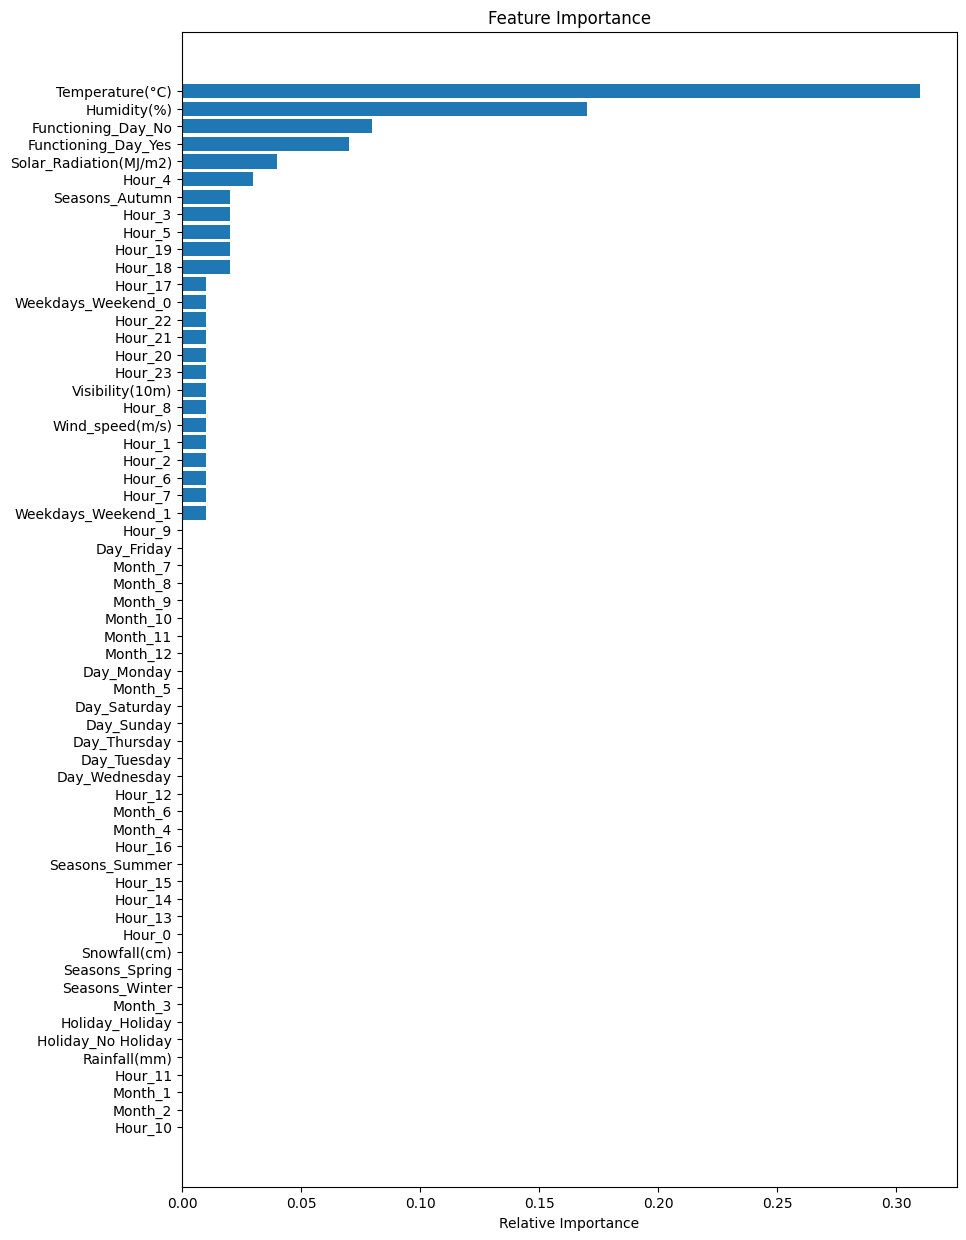

In [31]:
# Fit the model
rf_model = RandomForestRegressor(random_state=2019)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
importance_dict = {'Feature': features, 'Feature Importance': importances}
importance_df = pd.DataFrame(importance_dict)

# Round the feature importances for better readability
importance_df['Feature Importance'] = round(importance_df['Feature Importance'], 2)

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.title('Feature Importance')
plt.barh(range(len(importance_df)), importance_df['Feature Importance'])    # align='center'
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

#### **4. GRADIENT BOOSTING**

In [32]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_train_GB = gb_model.predict(X_train)
y_pred_test_GB = gb_model.predict(X_test)

In [33]:
# Gradient Boosting Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_GB_train = mean_squared_error(y_train, y_pred_train_GB)
RMSE_GB_train = np.sqrt(MSE_GB_train)
MAE_GB_train = mean_absolute_error(y_train, y_pred_train_GB)
r2_GB_train = r2_score(y_train, y_pred_train_GB)
Adjusted_R2_GB_train = (1-(1-r2_score(y_train, y_pred_train_GB))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Train set Evaluation Metrics")
print("MSE :", MSE_GB_train)
print("RMSE :", RMSE_GB_train)
print("MAE :", MAE_GB_train)
print("R2 :", r2_GB_train)
print("Adjusted R2 :", Adjusted_R2_GB_train)

Gradient Boosting Train set Evaluation Metrics
MSE : 0.008816348922197789
RMSE : 0.09389541480923223
MAE : 0.06986979330931938
R2 : 0.8651206228267718
Adjusted R2 : 0.8613194191488039


In [34]:
# Gradient Boosting Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_GB_test = mean_squared_error(y_test, y_pred_test_GB)
RMSE_GB_test = np.sqrt(MSE_GB_test)
MAE_GB_test = mean_absolute_error(y_test, y_pred_test_GB)
r2_GB_test = r2_score((y_test), (y_pred_test_GB))
Adjusted_R2_GB_test = (1-(1-r2_score((y_test), (y_pred_test_GB)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Test set Evaluation Metrics")
print("MSE :", MSE_GB_test)
print("RMSE :", RMSE_GB_test)
print("MAE :", MAE_GB_test)
print("R2 :", r2_GB_test)
print("Adjusted R2 :", Adjusted_R2_GB_test)

Gradient Boosting Test set Evaluation Metrics
MSE : 0.00991099689455058
RMSE : 0.0995539898474721
MAE : 0.07470979410662457
R2 : 0.851636477226356
Adjusted R2 : 0.8474552600509597


**Conclusions:**

Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance.

The r2_score for the test set is 0.86. This means our linear model is  performing well on the data.

##### **FEATURES STORED**

                   Feature  Feature Importance
0          Temperature(°C)                0.32
1              Humidity(%)                0.18
37      Functioning_Day_No                0.12
4   Solar_Radiation(MJ/m2)                0.05
38     Functioning_Day_Yes                0.05


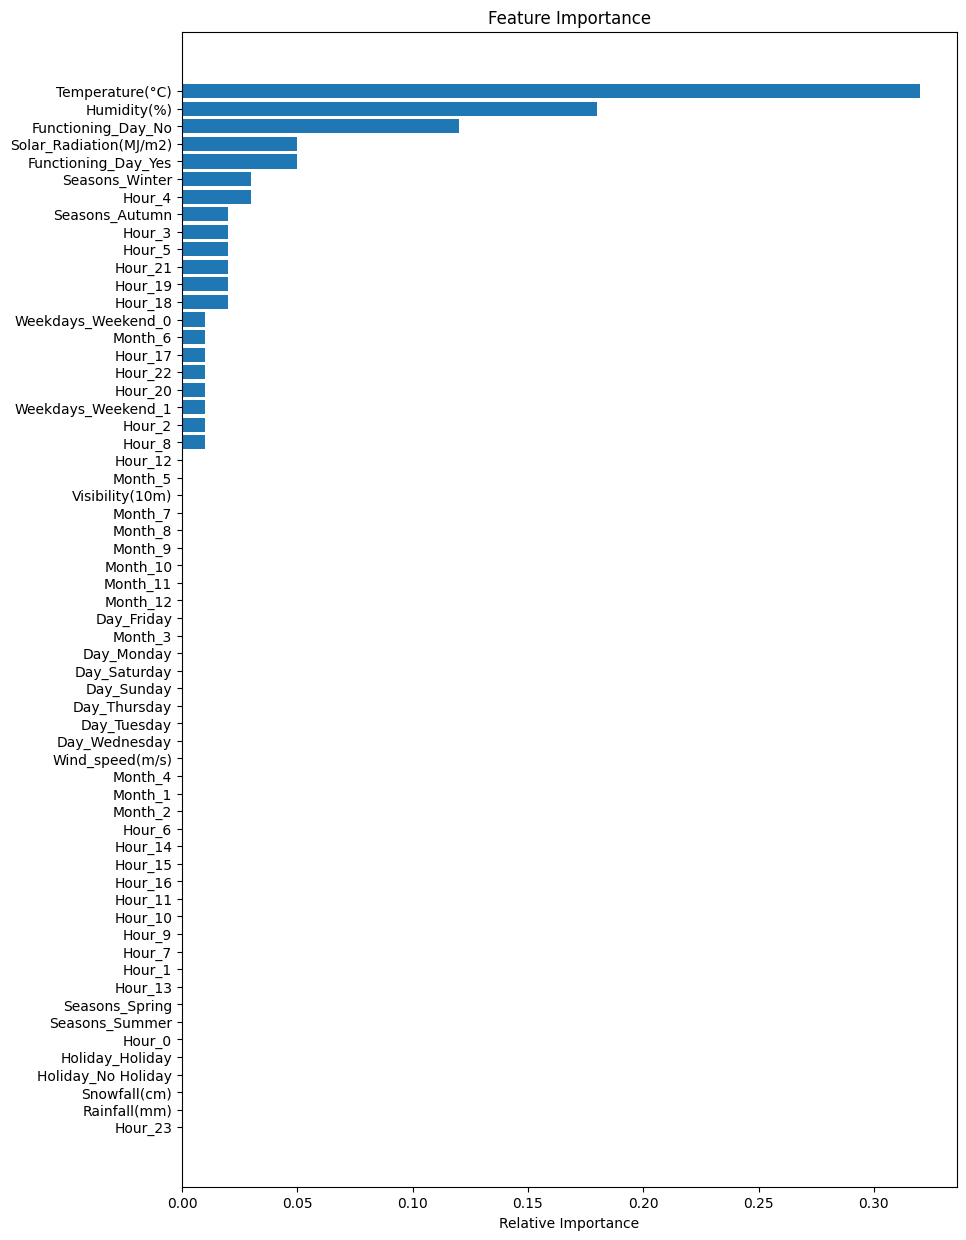

In [35]:
# Fit the model
gb_model = GradientBoostingRegressor(random_state=2019)
gb_model.fit(X_train, y_train)

# Extract feature importances
importances = gb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
importance_dict = {'Feature': features, 'Feature Importance': importances}
importance_df = pd.DataFrame(importance_dict)

# Round the feature importances for better readability
importance_df['Feature Importance'] = round(importance_df['Feature Importance'], 2)

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)

# Display the top features
print(importance_df.head())

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.title('Feature Importance')
plt.barh(range(len(importance_df)), importance_df['Feature Importance'])    #, color='blue', align='center'
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

### **Hyperparameter Tuning**

**5. Random Forest**

In [36]:
# Define hyperparameters for tuning
param_dict = {
    'n_estimators': [50, 80, 100],                        # 30, 120, 150
    'max_depth': [8, 10, 12],                             # 4, 6,
    'min_samples_split': [20, 50, 80],                    # 100, 150, 200
    'min_samples_leaf': [10, 30, 40]                      # 50, 60, 80
}

In [37]:
# Create an instance of the Random Forest Regressor
rf_model = RandomForestRegressor()

# Perform Grid Search
rf_random = GridSearchCV(rf_model, param_dict, verbose=2, cv=5)   #n_jobs=-1
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.8s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.8s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [10, 30, 40],
                         'min_samples_split': [20, 50, 80],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [38]:
# Best estimator
rf_optimal_model = rf_random.best_estimator_
print(rf_optimal_model)

RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=50)


In [39]:
# Predictions
y_pred_train_HRF = rf_optimal_model.predict(X_train)
y_pred_test_HRF = rf_optimal_model.predict(X_test)

In [40]:
# Random Forest Hyperparameter Tuning Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HRF_train = mean_squared_error(y_train, y_pred_train_HRF)
RMSE_HRF_train = np.sqrt(MSE_HRF_train)
MAE_HRF_train = mean_absolute_error(y_train, y_pred_train_HRF)
r2_HRF_train = rf_optimal_model.score(X_train, y_train)
Adjusted_R2_HRF_train = 1 - (1 - r2_HRF_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Hyperparameter Tuning Train set Evaluation Metrics")
print("MSE:", MSE_HRF_train)
print("RMSE:", RMSE_HRF_train)
print("MAE:", MAE_HRF_train)
print("R2:", r2_HRF_train)
print("Adjusted R2:", Adjusted_R2_HRF_train)

Random Forest Hyperparameter Tuning Train set Evaluation Metrics
MSE: 0.008243490781193928
RMSE: 0.09079367148206932
MAE: 0.06295163020570307
R2: 0.8738846531469275
Adjusted R2: 0.8727221211433657


In [41]:
# Random Forest Hyperparameter Tuning Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HRF_test = mean_squared_error(y_test, y_pred_test_HRF)
RMSE_HRF_test = np.sqrt(MSE_HRF_test)
MAE_HRF_test = mean_absolute_error(y_test, y_pred_test_HRF)
r2_HRF_test = r2_score(y_test, y_pred_test_HRF)
Adjusted_R2_HRF_test = 1 - (1 - r2_HRF_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Hyperparameter Tuning Test set Evaluation Metrics")
print("MSE:", MSE_HRF_test)
print("RMSE:", RMSE_HRF_test)
print("MAE:", MAE_HRF_test)
print("R2:", r2_HRF_test)
print("Adjusted R2:", Adjusted_R2_HRF_test)

Random Forest Hyperparameter Tuning Test set Evaluation Metrics
MSE: 0.010127468855220987
RMSE: 0.10063532607996552
MAE: 0.0695412613414502
R2: 0.8483959815417657
Adjusted R2: 0.8441234399224636


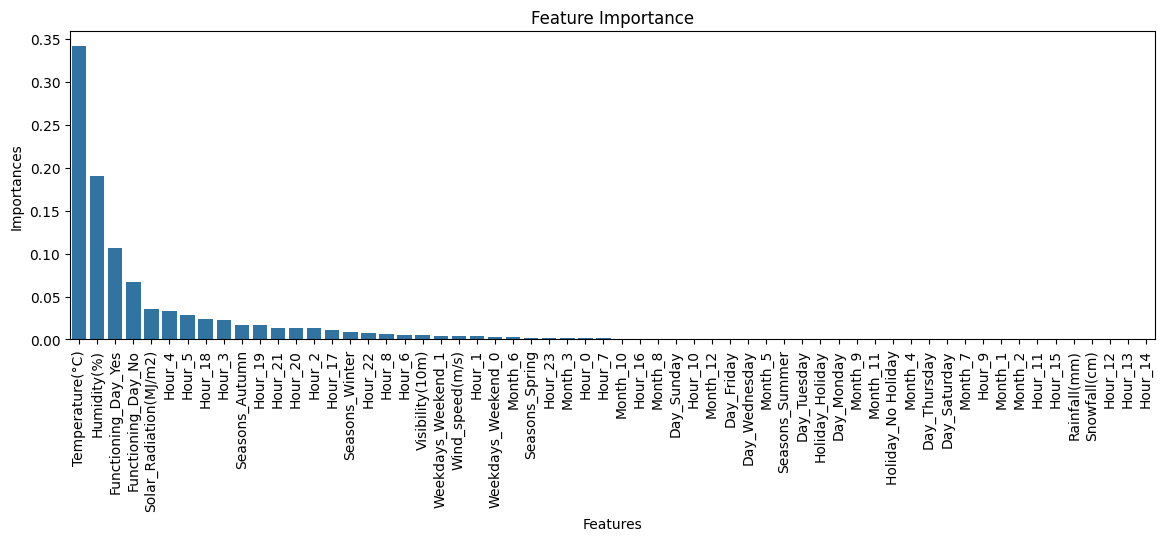

In [42]:
# Feature Importance
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importances': rf_optimal_model.feature_importances_
})
importances.sort_values(by='Importances', ascending=False, inplace=True)

plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature Importance')
plt.show()

**6. Gradient Boosting**

In [43]:
# Define hyperparameters for tuning
param_dict = {
    'n_estimators': [50, 80, 100],
    'max_depth': [4, 6, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
}

In [44]:
# Create an instance of the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(learning_rate=0.05, random_state=42)

# Perform Randomized Search
gb_random = GridSearchCV(gb_model, param_dict, verbose=2, cv=5)   #, n_iter=10, random_state=42
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [45]:
# Best estimator
gb_optimal_model = gb_random.best_estimator_
print(gb_optimal_model)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, random_state=42)


In [46]:
# Predictions
y_pred_train_HGB = gb_optimal_model.predict(X_train)
y_pred_test_HGB = gb_optimal_model.predict(X_test)

In [47]:
# Gradient Boosting Hyperparameter Tuning Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HGB_train = mean_squared_error(y_train, y_pred_train_HGB)
RMSE_HGB_train = np.sqrt(MSE_HGB_train)
MAE_HGB_train = mean_absolute_error(y_train, y_pred_train_HGB)
r2_HGB_train = gb_optimal_model.score(X_train, y_train)
Adjusted_R2_HGB_train = 1 - (1 - r2_HGB_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Hyperparameter Tuning Train set Evaluation Metrics")
print("MSE:", MSE_HGB_train)
print("RMSE:", RMSE_HGB_train)
print("MAE:", MAE_HGB_train)
print("R2:", r2_HGB_train)
print("Adjusted R2:", Adjusted_R2_HGB_train)

Gradient Boosting Hyperparameter Tuning Train set Evaluation Metrics
MSE: 0.005353712072494736
RMSE: 0.07316906499672342
MAE: 0.05084135168489558
R2: 0.9180947400930597
Adjusted R2: 0.9173397369290688


In [48]:
# Gradient Boosting Hyperparameter Tuning Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HGB_test = mean_squared_error(y_test, y_pred_test_HGB)
RMSE_HGB_test = np.sqrt(MSE_HGB_test)
MAE_HGB_test = mean_absolute_error(y_test, y_pred_test_HGB)
r2_HGB_test = r2_score(y_test, y_pred_test_HGB)
Adjusted_R2_HGB_test = 1 - (1 - r2_HGB_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Hyperparameter Tuning Test set Evaluation Metrics")
print("MSE:", MSE_HGB_test)
print("RMSE:", RMSE_HGB_test)
print("MAE:", MAE_HGB_test)
print("R2:", r2_HGB_test)
print("Adjusted R2:", Adjusted_R2_HGB_test)

Gradient Boosting Hyperparameter Tuning Test set Evaluation Metrics
MSE: 0.007216249915086245
RMSE: 0.08494851331887006
MAE: 0.0596265789214993
R2: 0.8919757245402958
Adjusted R2: 0.8889313579233009


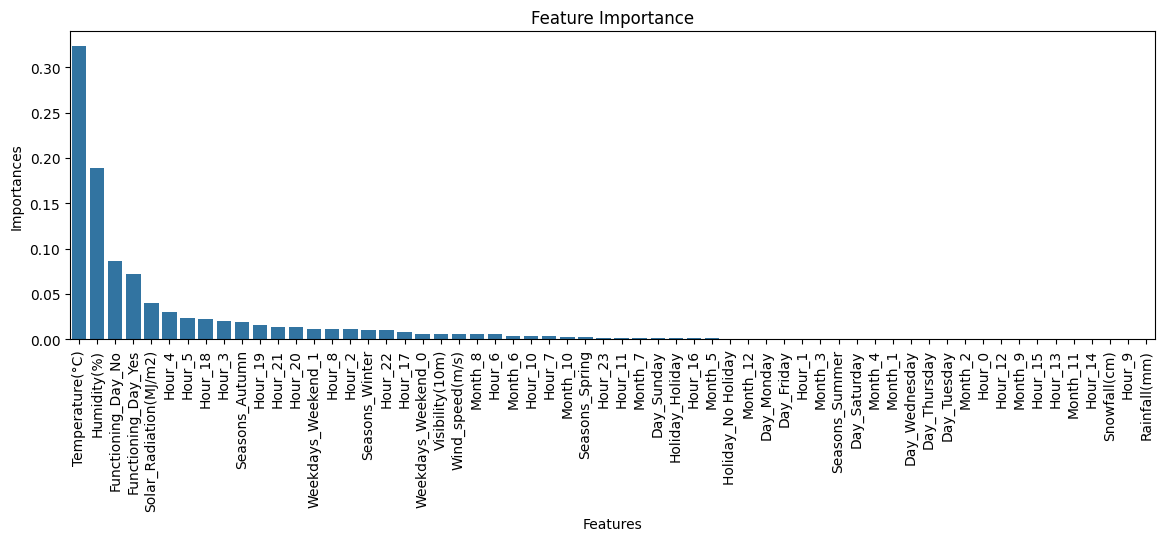

In [49]:
# Feature Importance
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importances': gb_optimal_model.feature_importances_
})
importances.sort_values(by='Importances', ascending=False, inplace=True)

plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature Importance')
plt.show()

In [51]:
# Create a dictionary to store the data
data = {
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'Random Forest Hyperparameter Tuning',
        'Gradient Boosting Hyperparameter Tuning'
    ],
    'MSE_Train': [MSE_LR_train, MSE_DT_train, MSE_RF_train, MSE_GB_train, MSE_HRF_train, MSE_HGB_train],
    'RMSE_Train': [RMSE_LR_train, RMSE_DT_train, RMSE_RF_train, RMSE_GB_train, RMSE_HRF_train, RMSE_HGB_train],
    'MAE_Train': [MAE_LR_train, MAE_DT_train, MAE_RF_train, MAE_GB_train, MAE_HRF_train, MAE_HGB_train],
    'R2_Train': [r2_LR_train, r2_DT_train, r2_RF_train, r2_GB_train, r2_HRF_train, r2_HGB_train],
    'Adjusted_R2_Train': [Adjusted_R2_LR_train, Adjusted_R2_DT_train, Adjusted_R2_RF_train, Adjusted_R2_GB_train, Adjusted_R2_HRF_train, Adjusted_R2_HGB_train],
    'MSE_Test': [MSE_LR_test, MSE_DT_test, MSE_RF_test, MSE_GB_test, MSE_HRF_test, MSE_HGB_test],
    'RMSE_Test': [RMSE_LR_test, RMSE_DT_test, RMSE_RF_test, RMSE_GB_test, RMSE_HRF_test, RMSE_HGB_test],
    'MAE_Test': [MAE_LR_test, MAE_DT_test, MAE_RF_test, MAE_GB_test, MAE_HRF_test, MAE_HGB_test],
    'R2_Test': [r2_LR_test, r2_DT_test, r2_RF_test, r2_GB_test, r2_HRF_test, r2_HGB_test],
    'Adjusted_R2_Test': [Adjusted_R2_LR_test, Adjusted_R2_DT_test, Adjusted_R2_RF_test, Adjusted_R2_GB_test, Adjusted_R2_HRF_test, Adjusted_R2_HGB_test]
}

# Create a DataFrame from the dictionary
evaluation_metrics = pd.DataFrame(data)

# Display the DataFrame
evaluation_metrics

,Model,MSE_Train,RMSE_Train,MAE_Train,R2_Train,Adjusted_R2_Train,MSE_Test,RMSE_Test,MAE_Test,R2_Test,Adjusted_R2_Test
0,Linear Regression,0.015808,0.125728,0.095226,0.758164,0.751349,0.015468,0.124371,0.094181,0.768449,0.761923
1,Decision Tree,0.021781,0.147584,0.109810,0.666776,0.657385,0.025794,0.160605,0.118572,0.613875,0.602993
2,Random Forest,0.000785,0.028025,0.016963,0.987984,0.987645,0.005758,0.075882,0.046547,0.913804,0.911375
3,Gradient Boosting,0.008816,0.093895,0.069870,0.865121,0.861319,0.009911,0.099554,0.074710,0.851636,0.847455
4,Random Forest Hyperparameter Tuning,0.008243,0.090794,0.062952,0.873885,0.872722,0.010127,0.100635,0.069541,0.848396,0.844123
5,Gradient Boosting Hyperparameter Tuning,0.005354,0.073169,0.050841,0.918095,0.917340,0.007216,0.084949,0.059627,0.891976,0.888931


Based on the evaluation metrics for different regression models, the following conclusions can be drawn:

**1. Linear Regression:**
* Training: Shows a moderate performance with an MSE of 0.015808 and an R² of 0.758164.
* Testing: Maintains similar performance with an MSE of 0.015468 and an R² of 0.768449. This indicates that the model generalizes reasonably well to new data.

**2. Decision Tree:**
* Training: Exhibits higher errors (MSE of 0.021781) and lower R² (0.666776) compared to Linear Regression.
* Testing: Performance decreases further (MSE of 0.025794, R² of 0.613875), suggesting that the model might be overfitting the training data and performing poorly on unseen data.

**3. Random Forest:**
* Training: Achieves the best performance among all models with an extremely low MSE of 0.000785 and a very high R² of 0.987984, indicating an excellent fit to the training data.
* Testing: Also performs well on the test set with an MSE of 0.005758 and an R² of 0.913804. This demonstrates the model’s strong generalization ability.

**4. Gradient Boosting:**
* Training: Shows good performance with an MSE of 0.008816 and an R² of 0.865121.
* Testing: Performs slightly worse on the test set (MSE of 0.009911, R² of 0.851636), but still demonstrates solid generalization.

**5. Random Forest Hyperparameter Tuning:**
* Training: Performs similarly to the untuned Random Forest, with an MSE of 0.008243 and an R² of 0.873885.
* Testing: Shows good generalization with an MSE of 0.010127 and an R² of 0.848396, slightly lower than the untuned Random Forest but still strong.

**6. Gradient Boosting Hyperparameter Tuning:**
* Training: Further improved performance with an MSE of 0.005354 and an R² of 0.918095.
* Testing: Best among Gradient Boosting models, with an MSE of 0.007216 and an R² of 0.891976, indicating enhanced generalization due to hyperparameter tuning.

**Conclusion:**
* Random Forest (both tuned and untuned) demonstrates the best overall performance in terms of both training and testing metrics, suggesting it is highly effective for this problem.
* Gradient Boosting also performs well, particularly after hyperparameter tuning.
* Linear Regression is a simpler model that performs moderately well, indicating it's a reasonable baseline model.
* Decision Tree shows the weakest performance, with signs of overfitting and poor generalization to the test set.

**Note:** For practical application, Random Forest and Gradient Boosting (especially after hyperparameter tuning) are the recommended models due to their superior performance and generalization capabilities.